In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#  **1.Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **2.Loading Data**

In [5]:
path="../input/google-play-store-apps/googleplaystore.csv"
df=pd.read_csv(path)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


3.Take General look

In [6]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


-Have to change data types for installs , price and size columns.

In [8]:
sum(df.duplicated())

483

There are 483 duplicated rows , We should remove them

In [9]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

There are some missing data , They will be removed

In [10]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

There are undesired columns will be removed

# **3.Data Cleaning**

In [11]:
df.dropna(axis=0,inplace=True)

In [12]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

-Missing data had been removed.

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
sum(df.duplicated())

0

-Duplicated data had been removed.

In [15]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [16]:
df.drop(['Android Ver','Current Ver','Content Rating'],axis=1,inplace=True)

In [17]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Genres', 'Last Updated'],
      dtype='object')

-Undesired columns had been removed.

In [18]:
df['Size'] = df['Size'].str.extract('(\d+)').astype(float)

In [19]:
def remove_dollar(s):
    return float(s.strip().replace('$',''))

df['Price']=df['Price'].apply(remove_dollar)

In [20]:
def remove_plus(s):
    return float(s.strip().replace('+','').replace(',',''))

df['Installs']=df['Installs'].apply(remove_plus)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   App           8886 non-null   object 
 1   Category      8886 non-null   object 
 2   Rating        8886 non-null   float64
 3   Reviews       8886 non-null   object 
 4   Size          7418 non-null   float64
 5   Installs      8886 non-null   float64
 6   Type          8886 non-null   object 
 7   Price         8886 non-null   float64
 8   Genres        8886 non-null   object 
 9   Last Updated  8886 non-null   object 
dtypes: float64(4), object(6)
memory usage: 763.6+ KB


-All Data types had been Changed to proper ones.

# **4.Creating Visuals**

In [24]:
sns.set_style('darkgrid')
# Setting Style

Q1: Was paid apps. satisfy customers rather than free apps?

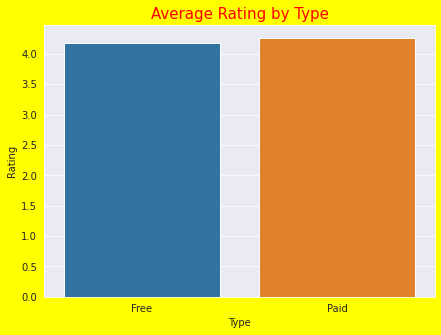

In [25]:
plt.figure(figsize=(7,5),facecolor='yellow')
plt.title('Average Rating by Type',fontsize=15,c='r')
x=df.groupby(['Type'])['Rating'].mean()
x=x.reset_index()
sns.barplot(data=x,x='Type',y='Rating');

A slightly increase in average rating for paid applications.

Q2: what was the top 10 genres in average rating ?
    what was the top 10 genres in price? What about Installs?

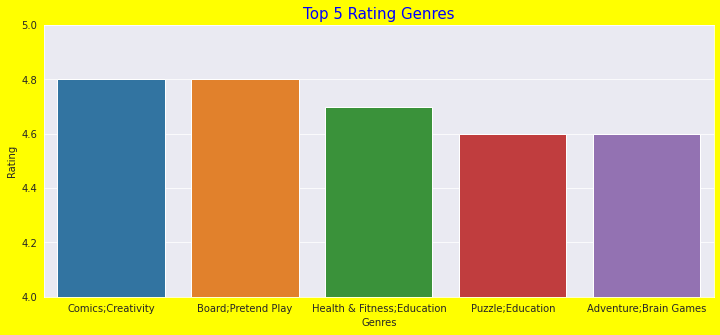

In [26]:
x=df.groupby(['Genres'])['Rating'].mean().sort_values(ascending=False).head(5)
x=x.reset_index()
plt.figure(figsize=(12,5),facecolor='yellow')
plt.title('Top 5 Rating Genres',fontsize=15,c='b')
plt.ylim(4,5)
sns.barplot(data=x,x='Genres',y='Rating');

Comics ,board and health genres apps are the higher rating applications.

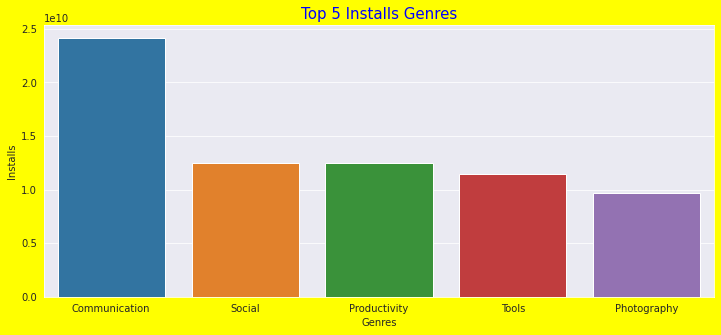

In [27]:
x=df.groupby(['Genres'])['Installs'].sum().sort_values(ascending=False).head(5)
x=x.reset_index()
plt.figure(figsize=(12,5),facecolor='yellow')
plt.title('Top 5 Installs Genres',fontsize=15,c='b')
sns.barplot(data=x,x='Genres',y='Installs');

Arcade,Action and Casual Genres are the most installed Genres

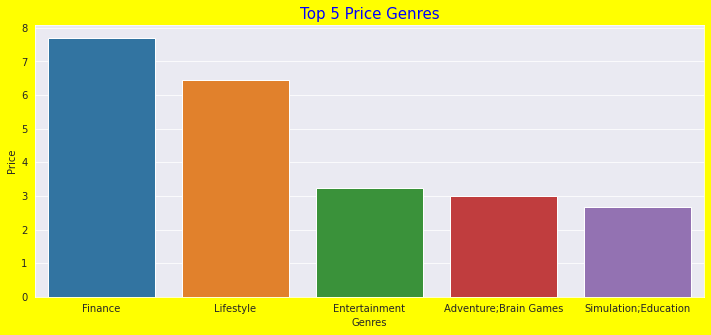

In [28]:
x=df.groupby(['Genres'])['Price'].mean().sort_values(ascending=False).head(5)
x=x.reset_index()
plt.figure(figsize=(12,5),facecolor='yellow')
plt.title('Top 5 Price Genres',fontsize=15,c='b')
sns.barplot(data=x,x='Genres',y='Price');

Financial and lifestyle apps are the most price Genres.

Q: How app. size affects number of installations?

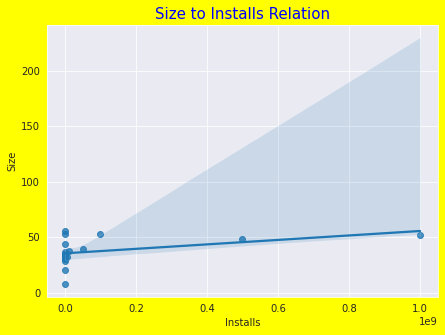

In [29]:
plt.figure(figsize=(7,5),facecolor='yellow')
plt.title('Size to Installs Relation',fontsize=15,c='b')
x=df.groupby('Installs')['Size'].mean()
x=x.reset_index()
sns.regplot(data = x,x='Installs',y='Size');

Slight Direct proportional between relation between installs and size of applications.

Q: What were the highest genres in number of Apps.?

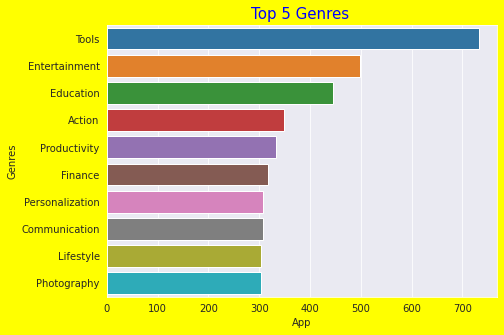

In [31]:
plt.figure(figsize=(7,5),facecolor='yellow')
plt.title('Top 5 Genres ',fontsize=15,c='b')
plt.xlabel('Apps. Count')
x=df.groupby('Genres')['App'].count().sort_values(ascending=False).head(10)
x=x.reset_index()
sns.barplot(data=x,x='App',y='Genres',orient='h');

Tools , Entrainment and Education are the genres of the most number of Apps.

# **> **Concolusion:******
1-Paid applications had slightly increase in customer reviews rather than free Apps.
2-Comics ,board and health genres apps are the higher rating Genres.
3-Arcade,Action and Casual Genres are the most installed Genres.
4-Finance and Lifestyle are the highest price Genres
5-Slight Direct proportional between relation between installs and size of applications.
6- Tools , Entrainment and Education are the genres of the most number of Apps.